# Integrantes do trabalho
- Arthur Vinicius Santos Silva  RA:1903665
- Larissa Ionafa                RA:1903166
- Lucas da Silva Santos         RA:1904201

# Importando as bibliotecas

In [2]:
import pandas as pd
import plotly.express as px
import missingno as msno

# Importando as bases de dados

## Base de dados

Base de dados loja de jogos on-line.

In [3]:
dados = pd.DataFrame(pd.read_csv("../../0_bases_originais/original.csv"))

In [4]:
dados

,nome,porcentagem_desconto,preço,tipo
0,Darkest Dungeon: Ancestral Edition,0,"R$ 94,99",Pacote
1,Darkest Dungeon,0,"R$ 45,99",Padrão
2,Star Wars Empire at War - Gold Pack,0,Indisponivel,Padrão
3,RESIDENT EVIL 2 / BIOHAZARD RE:2 - DELUXE EDITION,0,"R$ 109,99",Padrão
4,Mad Max,-94%,"R$ 4,50",Padrão
...,...,...,...,...
235,Star Wars: Knights of the Old Republic II - Th...,0,"R$ 19,99",Padrão
236,LEGO Batman 3: Beyond Gotham Season Pass,-90%,"R$ 2,79",DLC
237,Far Cry 4,0,"R$ 89,99",Padrão
238,Castlevania: Lords of Shadow 2 - Dark Dracula ...,0,"R$ 2,19",DLC


In [5]:
# verificando o tamanho da base em linhas e colunas
dados.shape

(240, 4)

# Primeiros tratamentos

## Resetando o index e eliminando os duplicados

In [6]:
dados.index.value_counts()

0      1
1      1
152    1
153    1
154    1
      ..
84     1
85     1
86     1
87     1
239    1
Length: 240, dtype: int64

In [7]:
dados.reset_index(drop=True).index.value_counts()

0      1
1      1
152    1
153    1
154    1
      ..
84     1
85     1
86     1
87     1
239    1
Length: 240, dtype: int64

In [8]:
dados.duplicated().sum()

0

In [9]:
dados.loc[dados.nome.duplicated()==True]

,nome,porcentagem_desconto,preço,tipo


In [10]:
# criando um novo objeto dados, resetando o index do objeto anterior e eliminando duplicados
dados = dados.reset_index(drop=True).drop_duplicates()
dados.shape

(240, 4)

## Retirando variáveis

No pandas, utilizamos o comando .drop para eliminar as colunas que não pretendemos trabalhar.

In [11]:
#Não será necessário remoção de colunas

## Editando os nomes das colunas

### Nomes das colunas em minusculo

In [12]:
dados.columns

Index(['nome', 'porcentagem_desconto', 'preço', 'tipo'], dtype='object')

In [13]:
dados.columns = dados.columns.str.lower()

### Substituindo caracteres especiais das colunas

In [14]:
dados.columns = dados.columns.str.replace('ç', 'c')

In [15]:
dados.columns

Index(['nome', 'porcentagem_desconto', 'preco', 'tipo'], dtype='object')

### Substituindo caracteres especiais das linhas de colunas específicas

In [16]:
dados.preco=dados.preco.str.replace('\W','')
dados.preco=dados.preco.str.replace('R','')

/tmp/ipykernel_26805/1570654488.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  dados.preco=dados.preco.str.replace('\W','')


### Substituindo caracteres especiais de toda a base de dados

In [17]:
dados = dados.replace({'á':'a','ã':'a', 'â':'a', 'í':'i',
                ':' : '',
                '-' : '',
                "’" : "",
                "'" : "",
                "/" : "",
                "%" : "",
                'ÅŸ':'s',
                'Ä°':'I',
                'Ä±':'i',
                'Ã¶':'o',
                'Ã§':'c',
                'ÄŸ':'g',
                'Ã¼':'u',
                'Ã©':'e',
                'Ã¡':'a',
                'Ã³':'o',
                'Ã±':'nh',
                '&':'',
                'Ã…Ë†':'n',
                'Ã§':'c',
                'Ã­':'i',
                'Ã£':'a',
                'Ãº':'u',
                'Ã':'a',
                'Ãª':'e',
                'Ã‘':'N',
                'aÂ¢':'a',
                'aÂª':'e',
                'aÂ':'a',
                "á":"a",
                "é":"e",
                "í":"i",
                "ó":"o",
                "ú":"u",
                "ã":"a",
                "õ":"o",
                "aª":"e",
                "á":"a",
                "é":"e",
                "í":"i",
                "ó":"o",
                "ú":"u",
                "ã":"a",
                "õ":"o",
                "ê":"e",
                "â":"a",
                "ô":"o",
                "ê":"e",
                "â":"a",
                "ô":"o"               
              }, regex=True)

## Convertendo preços para númerico

In [18]:
dados.preco = pd.to_numeric(dados.preco, errors='coerce')

## Dados Missing

<Axes: >

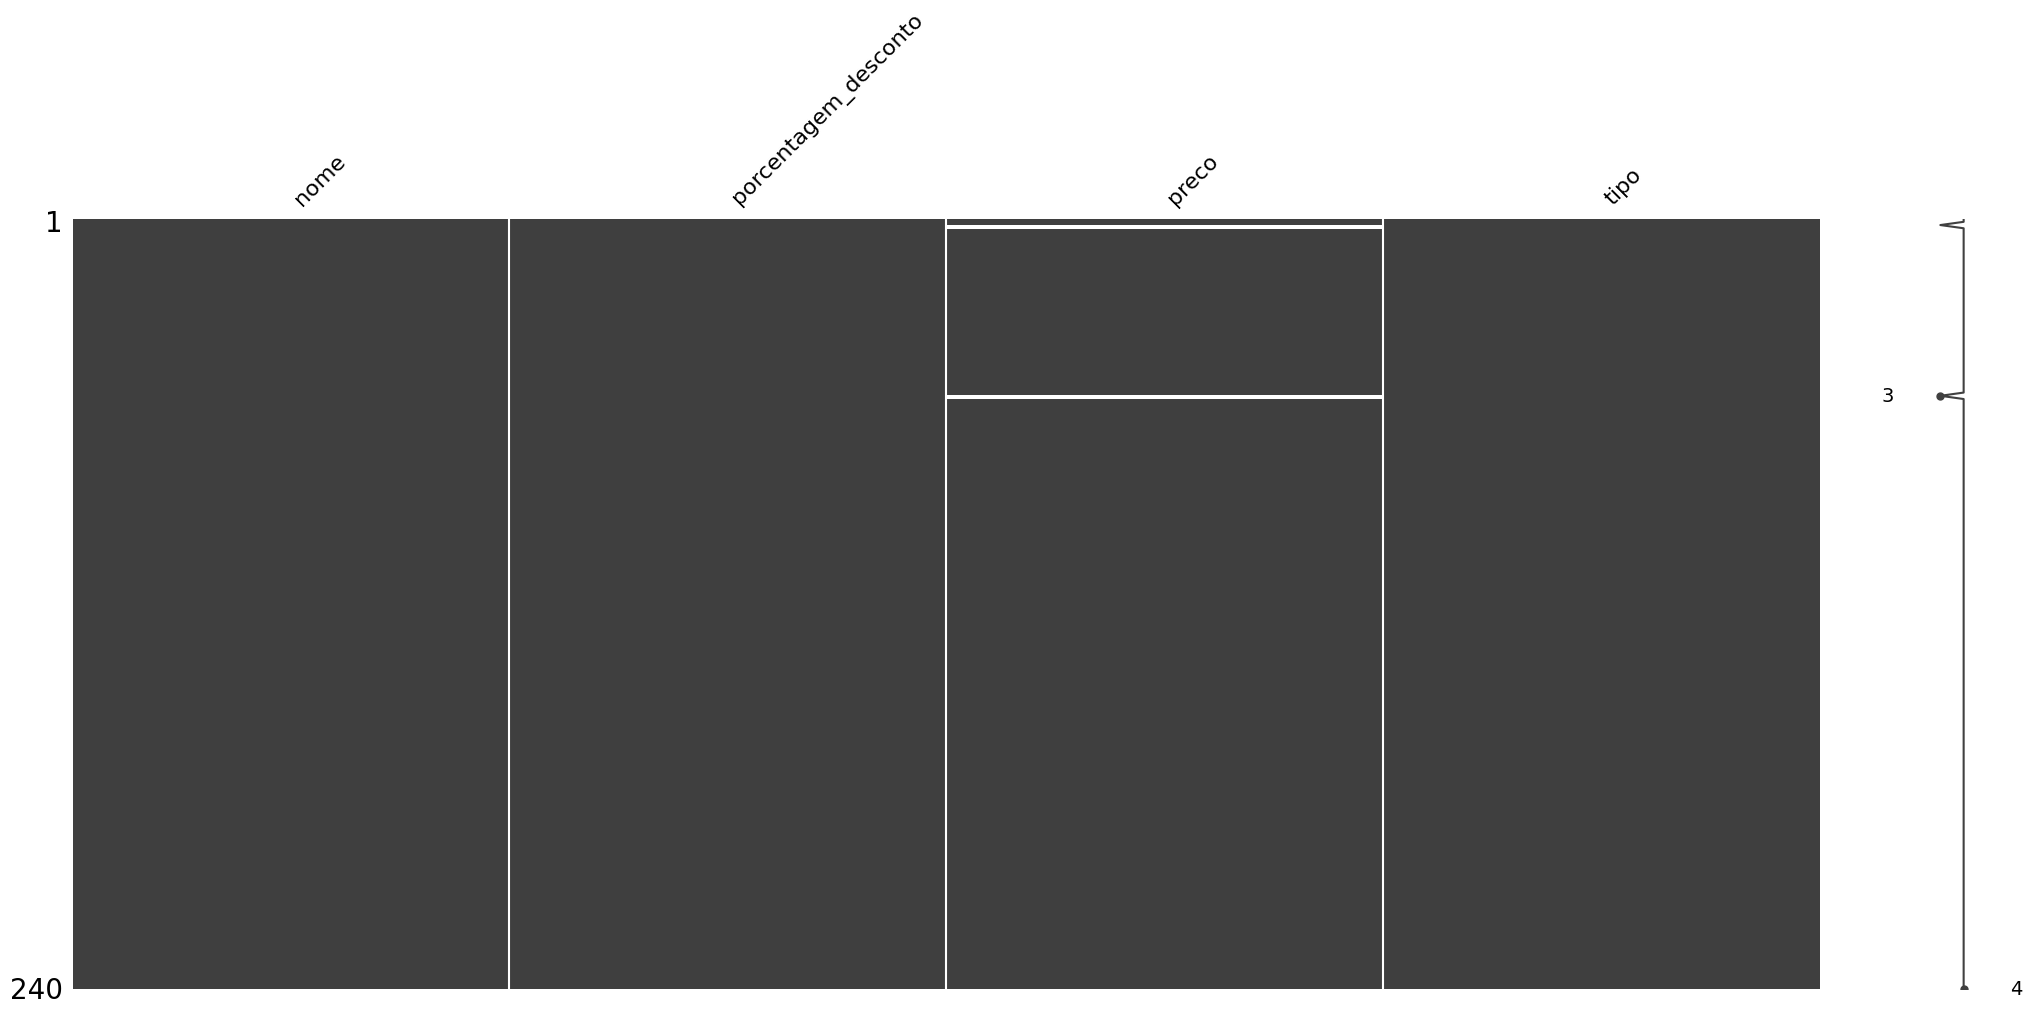

In [19]:
msno.matrix(dados)

<Axes: >

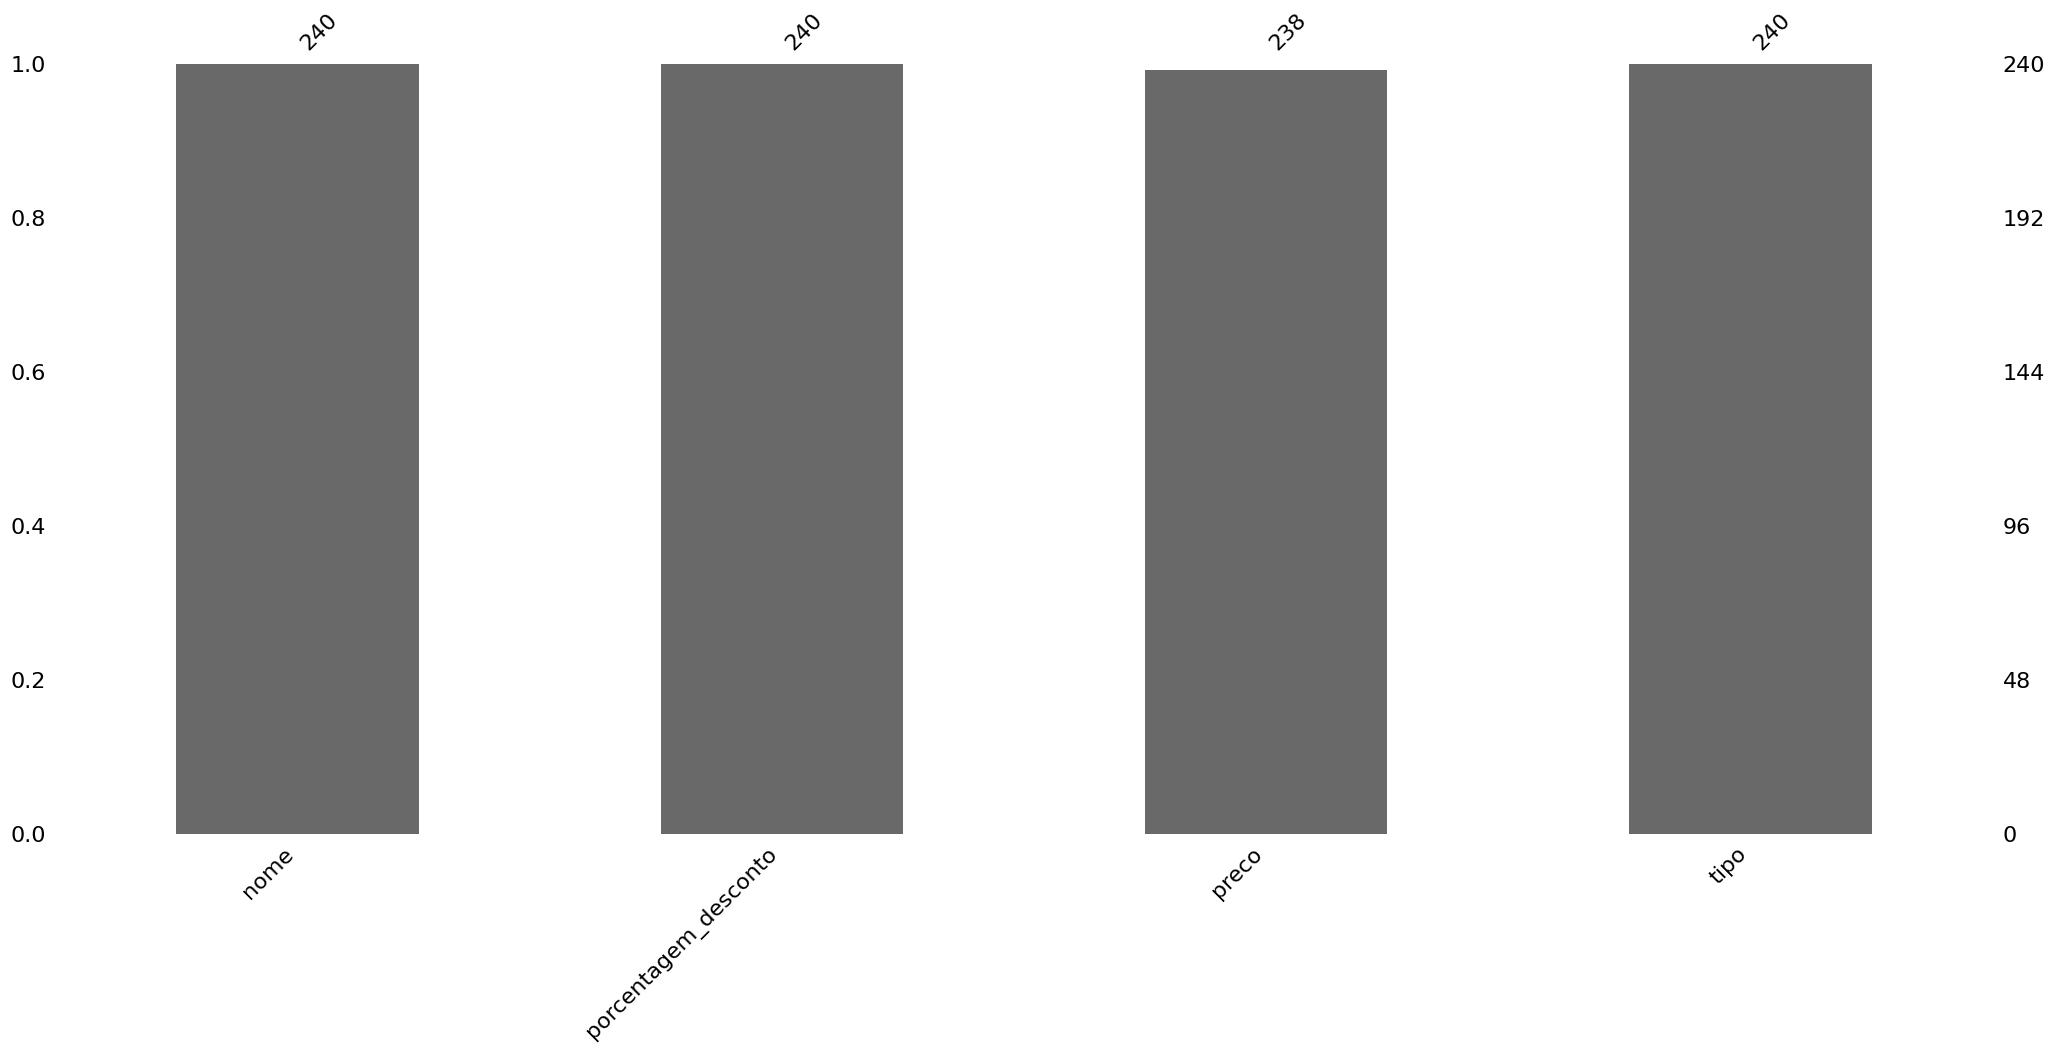

In [20]:
msno.bar(dados)

### Justificativa da remoção de dados nulos
Em análise dos dados, entendemos que os itens que retornaram indisponíveis da raspagem de dados, não fariam sentido serem expostos ou estarem contidos na base tratada.

In [21]:
dados = dados.dropna()
dados.isna().sum()

nome                    0
porcentagem_desconto    0
preco                   0
tipo                    0
dtype: int64

### Resetando index

In [22]:
dados = dados.reset_index(drop=True)
dados

,nome,porcentagem_desconto,preco,tipo
0,Darkest Dungeon Ancestral Edition,0,9499.0,Pacote
1,Darkest Dungeon,0,4599.0,Padrao
2,RESIDENT EVIL 2 BIOHAZARD RE2 DELUXE EDITION,0,10999.0,Padrao
3,Mad Max,94,450.0,Padrao
4,Enter the Gungeon,0,2799.0,Padrao
...,...,...,...,...
233,Star Wars Knights of the Old Republic II The ...,0,1999.0,Padrao
234,LEGO Batman 3 Beyond Gotham Season Pass,90,279.0,DLC
235,Far Cry 4,0,8999.0,Padrao
236,Castlevania Lords of Shadow 2 Dark Dracula Co...,0,219.0,DLC


### Transformando o preço para valor monetário

In [23]:
dados['preco'] = dados['preco'].div(100)
dados.preco

0       94.99
1       45.99
2      109.99
3        4.50
4       27.99
        ...  
233     19.99
234      2.79
235     89.99
236      2.19
237      7.39
Name: preco, Length: 238, dtype: float64

## Tranformando texto para lower case e criando padrão de uso

In [24]:
dados.nome = dados.nome.str.lower()
dados.tipo = dados.tipo.str.lower()
dados

,nome,porcentagem_desconto,preco,tipo
0,darkest dungeon ancestral edition,0,94.99,pacote
1,darkest dungeon,0,45.99,padrao
2,resident evil 2 biohazard re2 deluxe edition,0,109.99,padrao
3,mad max,94,4.50,padrao
4,enter the gungeon,0,27.99,padrao
...,...,...,...,...
233,star wars knights of the old republic ii the ...,0,19.99,padrao
234,lego batman 3 beyond gotham season pass,90,2.79,dlc
235,far cry 4,0,89.99,padrao
236,castlevania lords of shadow 2 dark dracula co...,0,2.19,dlc


## Tratamento de Outlier

Ao realizar análise dos outlier da base, verificamos que apesar de fora do desvio padrão, estes dados não deveriam ser descartados, uma vez que representam o valor real do item.

In [25]:
px.box(dados.preco)

## Salvar base de dados tratadas

In [27]:
dados.to_csv("../../1_bases_tratadas/base_tratada.csv", index=True)